In [3]:
import sys
print(sys.executable)


/opt/miniconda3/envs/rdkit-env/bin/python


## Comparing Classifiers for Building Classification Models
- building a regression model of corona inhibitors using the random forest algorithm
- The Random Forest algorithm was chosen because it is robust, handles high-dimensional data well, and is widely used for chemical informatics tasks.

### Importing libraries

In [1]:
!conda install -y scikit-learn


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



### Load the dataset

In [3]:
df = pd.read_csv('bioactivity_data_3class_pIC50_morgan_fp.csv')

### Input features

In [11]:
X = df.drop(columns=['canonical_smiles', 'molecule_chembl_id', 'pIC50'])

X

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
Y = df['pIC50']
Y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
422    6.790003
423    6.782516
424    6.779997
425    6.793174
426    6.790003
Name: pIC50, Length: 427, dtype: float64

### Data dimension

In [13]:
X.shape

(427, 2048)

In [14]:
Y.shape

(427,)

### Remove low variance features

In [15]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [17]:
X.shape

(427, 48)

### Data Split - 80/20 ratio

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [19]:
X_train.shape, Y_train.shape

((341, 48), (341,))

## Building a Regression Model using Random Forest

In [25]:
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6039997169848297

In [26]:
Y_pred = model.predict(X_test)

## Scatter plot of Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

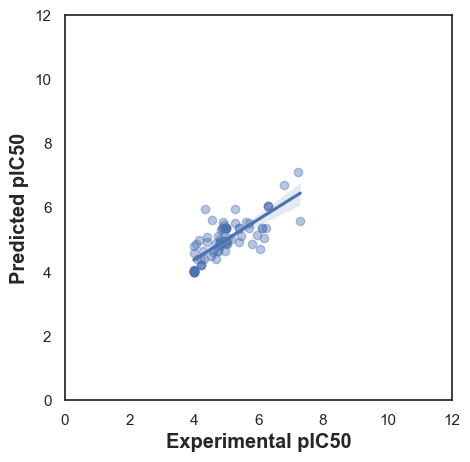

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show